In this journal, I will employ R to produce some commonly used plots which include boxplot, heatmap, PCA map, volcano map and correlation graph.

normalize (scale) or not:
1. yes: PCA map, 
2. no: boxplot to explore difference between variables, volcano map
3. all ok: heatmap, correlation graph

In [1]:
rm(list = ls())
library(ggplot2)
library(ggpubr) # for ggboxplot() function
library(ISLR) # for Smarket data
library(ROCR) # for roc() function
library(reshape2) # for melt() function
library(ComplexHeatmap) # for Heatmap() function
library(FactoMineR) # for PCA()
library(factoextra) # better plot of PCA
library(corrplot) # for corelation plot
library(RColorBrewer) # for brewer.pal

载入需要的程序包：grid

ComplexHeatmap version 2.20.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

corrplot 0.92 loaded



## 1. boxplot
note: if you want to explore the difference between boxes, do not normalize (scale) data

In [2]:

#' Plot boxplot
#' @param ggdat: a data frame, columns include x and y,
#' 	in which x is categorical and y is numerical
#' @param x, y: string, name of two columns in ggdat
#' @param title: string, title of the boxplot
#' @param xlab, ylab: string, default NA, label of x-axis and y-axis
#' @param legpos: the position of legends, "none" default, 
#' 	"left", "right", "bottom", "top" or two-element numeric vector
#' @param legtit: string, title of legend
#' @param filepath: string, name and path of this graph
#' @param wid, hig: float, width and height of the picture
plot_boxplot <- function(ggdat, x, y, title, xlab = NA, 
	ylab = NA, legpos = "none", legtit = NA, filepath = NA, 
	wid = 25, hig = 26){
	p <- ggboxplot(ggdat, x = x, y = y, lwd = 4,
			color = x, platte = "viridis", 
			add = "jitter", 
			add.params = list(size = 3)) + ## size of dots
		# geom_hline(yintercept = yintercept, linewidth = 2.5)+
		ggtitle(title) +
		xlab(xlab) +
		ylab(ylab) +
		theme(plot.title = element_text(size = 60, 
			face = "bold", hjust = 0.5),
			legend.position = legpos,
			legend.key.size = unit(.8, "cm"),
        	legend.title = element_text(size = 35),
        	axis.title.x = element_text(size = 50),
        	axis.title.y = element_text(size = 50),
        	axis.text.x = element_text(size = 35, 
				angle = 90),
       		axis.text.y = element_text(size = 35))
	# p <- p +
    #     annotate("text", x = -Inf,  # Adjust the x position as needed
    #     y = yintercept,
    #     size = 15, 
    #     label = round(yintercept, 2),
    #     color = "black",
    #     vjust = -0.5,
    #     hjust = 0  # Adjust horizontal justification
    # )
	ggpar(p, legend.title = legtit)
	print(p)
	if(!is.na(filepath)){
		ggsave(filepath, width = wid, height = hig)
	}
}

In [3]:
# view data
colnames(Smarket)
head(Smarket)
typeof(Smarket$Direction)
dat1 <- Smarket
dat1$Direction <- as.factor(dat1$Direction)
# dat1$Volume

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
6,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


[1] "integer"

### 1.1 for two columns in a data frame (note: one should be qualitative)

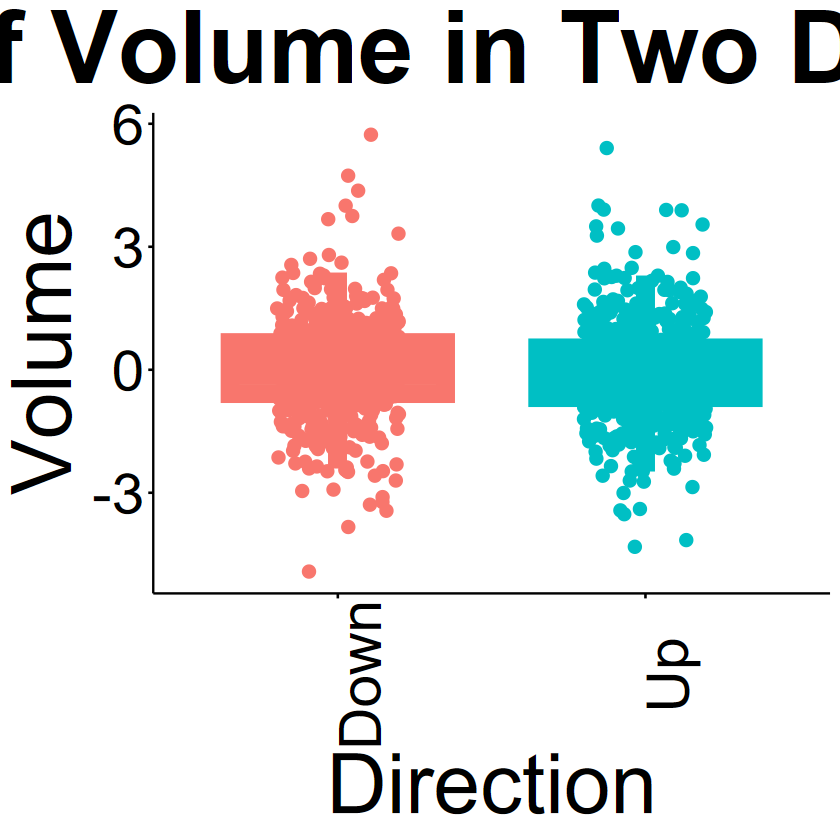

In [4]:
plot_boxplot(ggdat = dat1, x = "Direction", y = "Lag1",
	title = "Distribution of Volume in Two Direction of Stock",
	xlab = "Direction", ylab = "Volume")

### 1.2 for all variables in a data frame (exclude y-categorical)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume     Today 
   "2001"  "-0.001"  "-0.001"  "-0.001"  "-0.001"  "-0.001" "0.35607"  "-0.001" 
Direction        ID 
   "Down"    "   1"

Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume     Today 
   "2005"  " 5.733"  " 5.733"  " 5.733"  " 5.733"  " 5.733" "3.15247"  " 5.733" 
Direction        ID 
     "Up"    "1250"

[1] 8750    3

,ID,var,value
,<dbl>,<fct>,<dbl>
1,1,Lag1,0.381
2,2,Lag1,0.959
3,3,Lag1,1.032
4,4,Lag1,-0.623
5,5,Lag1,0.614
6,6,Lag1,0.213


,ID,var,value
,<dbl>,<fct>,<dbl>
8745,1245,Today,0.422
8746,1246,Today,0.043
8747,1247,Today,-0.955
8748,1248,Today,0.130
8749,1249,Today,-0.298
8750,1250,Today,-0.489


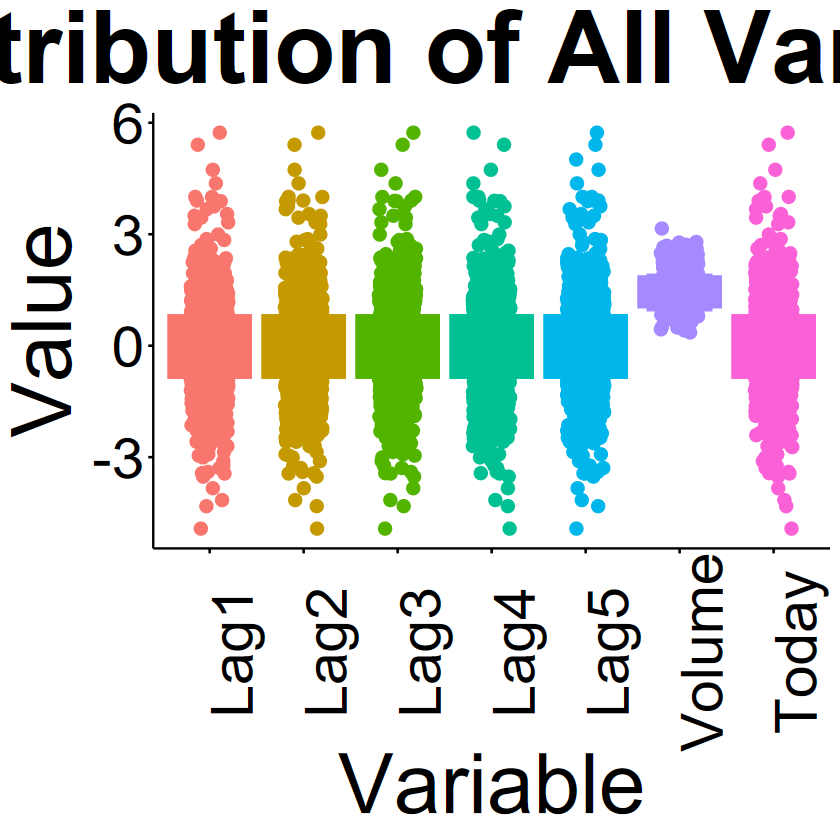

In [5]:
colnames(dat1)
# create ID column
dat1$ID <- as.numeric(rownames(dat1))

# examine the limits of dat1
apply(dat1, 2, min)
apply(dat1, 2, max)

# reconstruct dat1 to dat2 which assemble all columns in 
#  dat1 to 3 new columns (ID, var and value) 
dat2 <- melt(dat1[, -c(1, 9)], 
	id.vars = "ID", variable.name = "var",
	value.name = "value")
dim(dat2)
head(dat2)
tail(dat2)

plot_boxplot(ggdat = dat2, x = "var", y = "value",
	title = "Distribution of All Variables", 
	xlab = "Variable", ylab = "Value")

## 2. Heatmap
note: normalize (scale) or not is ok
1. normalize: can show original distribution of data, but may be not good-looking
2. not normalize: more beautiful

[1] 1250   10

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,ID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
2,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,2
3,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,3
4,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,4
5,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,5
6,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,6


[1] "double"

[1] "Lag1"   "Lag2"   "Lag3"   "Lag4"   "Lag5"   "Volume" "Today"  "ID"    
[9] "batch"

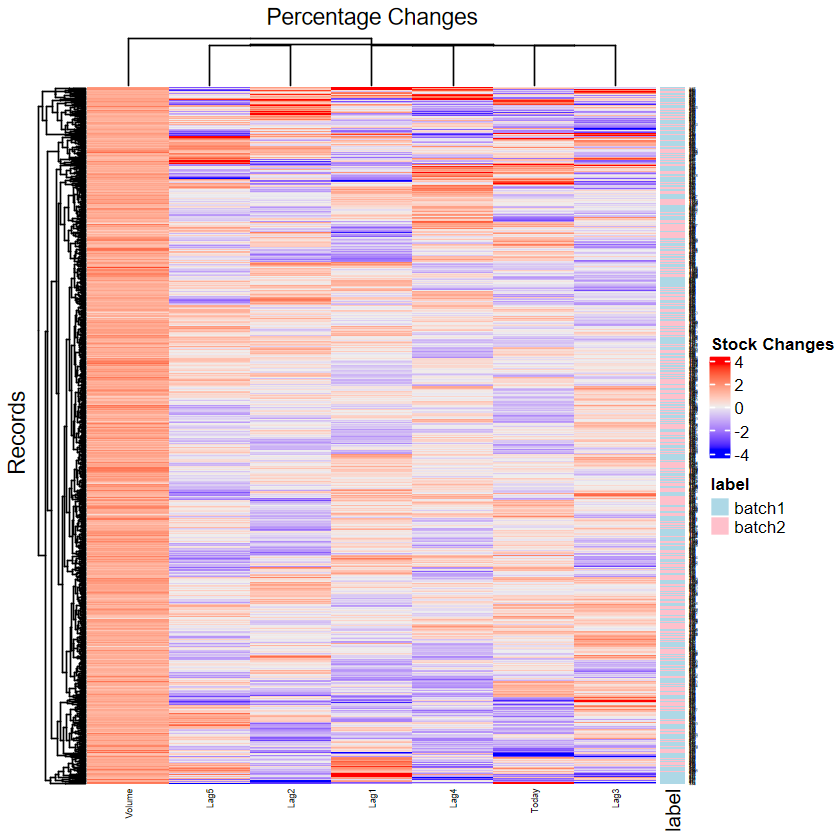

In [6]:
# data process
dim(dat1)
dat3 <- dat1[, -c(1, 9)]
head(dat3)
dat3$batch <- sample(x = c("batch1", "batch2"), size = nrow(dat3), replace = T)
typeof(dat3$Lag1)
colnames(dat3)

# heatmap with row tag
row_tag <- rowAnnotation(label = dat3$batch,
    col = list(label = c("batch1" = "lightblue",
        "batch2" = "pink")))
# png(filename = "Heatmap-of-Smarket.jpg", width = 1000, height = 1000)
# must remove the "batch" column
Heatmap(as.matrix(dat3[, -c(8, 9)]), 
    cluster_columns = T, cluster_rows = T,
    right_annotation = row_tag,
    heatmap_legend_param = list(title = "Stock Changes"),
    row_names_gp = gpar(fontsize = 2),
    column_names_gp = gpar(fontsize = 5),
    row_title = " Records",
    column_title = "Percentage Changes")
# dev.off()

## 3. PCA Map for Batch Checking
more details in Chapter10-Unsupervised Learning

note:
	the data must to be normalized (scaled), in that different range in variable may cause migration of pricipal component


batch1 batch2 
   646    604 

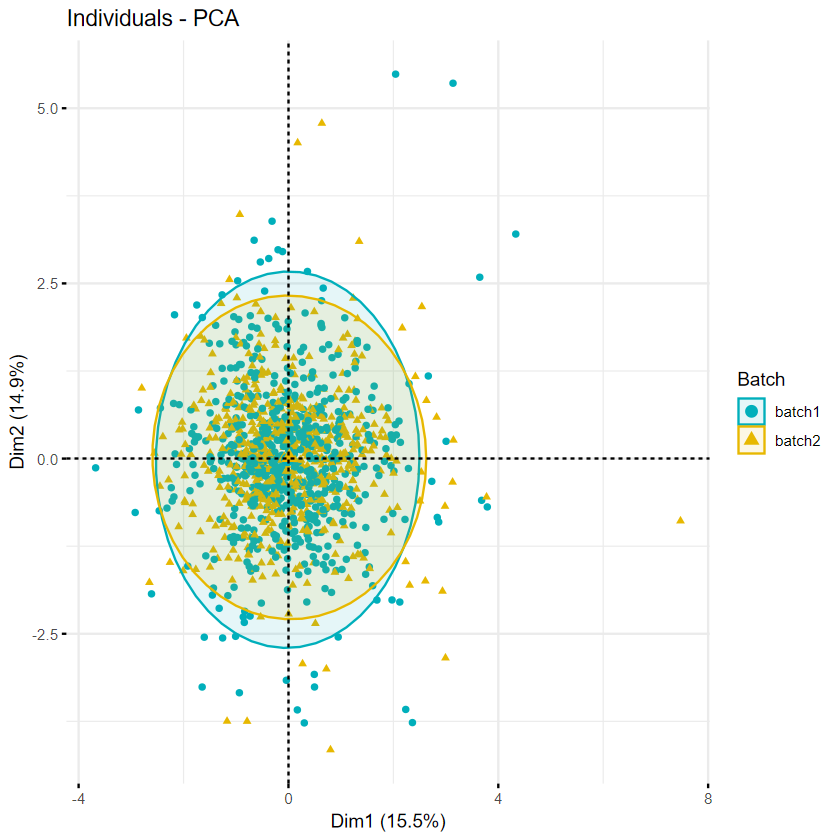

In [7]:
table(dat3$batch)
spca <- PCA(dat3[, -c(8, 9)], graph = F)
fviz_pca_ind(spca, geom.ind = "point",
    col.ind = dat3$batch,
    palette = c("#00AFBB", "#E7B800"),
    addEllipses = T,
    legend.title = "Batch")
# ggsave("PCA-of-individual-on-Smarket.jpg")

## 4. Volcano Map
note: data should not to  be normalized (scaled) when do difference analysis.

In [8]:
#' Plot volcano graph
#' @param dat: data frame, including varname, pvalue, fdr_pvalue,
#'  diff (diff of case and control), abs(diff) (abs of diff)
#' @param diffthres: float, threshold of difference
#' @param fdrpthres: float, threshold of fdr pvalue
#' @param title_plot: character, title of volcano plot
#' @param filepath: character, name and dir of volcano plot
#' @param wid, hig: all default 8, width and height of picture
#' @return None
plot_volcano_graph <- function(dat, diffthres, fdrpthres, 
    title_plot, filepath = NA, wid = 8, hig = 8){

    dat$diffex <- "NO"
    dat$diffex[dat$diff > diffthres & dat$fdr_pvalue <= fdrpthres] <- "Yes"
    dat$diffex[dat$diff < -diffthres & dat$fdr_pvalue <= fdrpthres]  <- "Yes"
    dat$diffex <- factor(dat$diffex, levels = c("Yes", "NO"))
    
    p <- ggplot(data=dat, aes(x=diff, y=-log10(fdr_pvalue), 
            col=diffex)) +
            geom_point() +
            scale_color_manual(values=c("#ff001e", "#00a2ff")) +
            ylab("-log10(FDR pvalue)") +
            xlab("Difference") +
            labs(col = "Diff Expressed") +
            ggtitle(title_plot) +
            geom_vline(xintercept=0.0, col="black") + 
            # geom_hline(yintercept=-log10(0.05), col="red")
            theme(plot.title = element_text(size=15, 
                    face="bold", hjust = 0.5),
                axis.text.x = element_text(size = 10, 
                    face = "bold"),
                axis.title.x = element_text(size = 10, 
                    face = "bold"),
                axis.text.y = element_text(size = 10, 
                    face = "bold"),
                axis.title.y = element_text(size = 10, 
                    face = "bold")) 
    if(!is.na(filepath)){
		ggsave(filename = filepath, width = wid, height = hig) 
	}
	print(p)
	      
}

In [9]:
#' Compute p-value and fold change (or difference in log data like miRNA CT)
#' @param dat: data frame, row is sample, columns are variables and qualitative
#' 	response, names "y"
#' @return a data frame, row is variable's name, columns are varname, pvalue,
#' 	fdr_pvalue, diff, abs(diff)
compute_pvalue_and_fc <- function(dat){
	out <- data.frame(matrix(NA, ncol = 5, nrow = ncol(dat) - 1))
	colnames(out) <- c("varname", "pvalue", "fdr_pvalue", "diff",
		"abs(diff)")
	rownames(out) <- colnames(dat)[2: ncol(dat)]
	out$varname <- rownames(out)
	for(i in rownames(out)){
		# print(i)
		case <- dat[which(dat$y == 1), i]
		con <- dat[which(dat$y == 0), i]
		out[i, "pvalue"] <- t.test(x = case, y = con)$p.value
		out[i, "diff"] <- log2(mean(case) / mean(con))
	}
	out$fdr_pvalue <- p.adjust(out$pvalue, method = "fdr")
	out[, "abs(diff)"] <- abs(out$diff)
	return(out)
}

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
 [7] "Volume"    "Today"     "Direction" "ID"


Down   Up 
 602  648 

[1] "y"      "Lag1"   "Lag2"   "Lag3"   "Lag4"   "Lag5"   "Volume" "Today"

,y,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.381,0.192,2.624,1.055,5.010,1.1913,0.959
2,1,0.959,0.381,0.192,2.624,1.055,1.2965,1.032
3,0,1.032,0.959,0.381,0.192,2.624,1.4112,0.623
4,1,0.623,1.032,0.959,0.381,0.192,1.2760,0.614
5,1,0.614,0.623,1.032,0.959,0.381,1.2057,0.213
6,1,0.213,0.614,0.623,1.032,0.959,1.3491,1.392


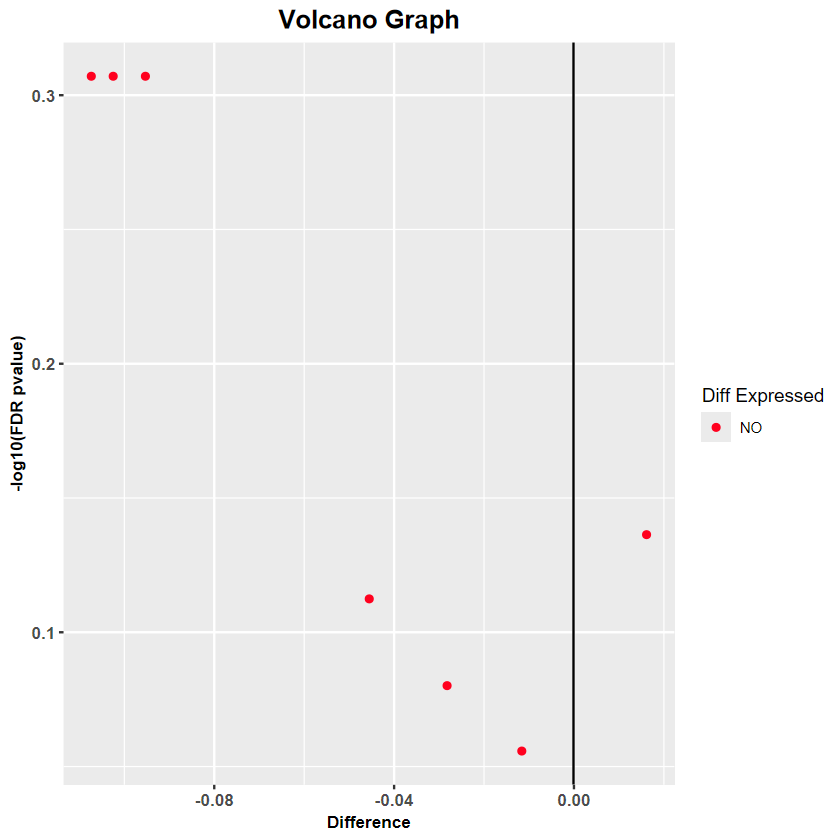

In [10]:
# data process
colnames(dat1)
dat4 <- dat1[, c("Direction", "Lag1", "Lag2", "Lag3", "Lag4", 
	"Lag5", "Volume", "Today")]
colnames(dat4)[1] <- "y"
table(dat4$y)
dat4$y <- ifelse(dat4$y == "Up", 1, 0)
colnames(dat4)
dat4 <- abs(dat4)
head(dat4)
# get result of difference analysis
diffex <- compute_pvalue_and_fc(dat = dat4)
# plot valcano map
plot_volcano_graph(dat = diffex, diffthres = 0.1,
	fdrpthres = 0.05,
	title_plot = "Volcano Graph")


## 5.Correlation Graph
note: normalize (scale) or not make little difference 

In [11]:
#' Plot correlation graph
#' @param df: a data frame, row is sample, columns are variables (not 
#' 	include response)
#'  which will be calculated correlation coefficients
#' @param filepath: string, path and name of correlation 
#'  coefficients matrix
#' @param graphpath: string, path and name of graph
plot_cor <- function(df, filepath = NA, graphpath = NA){
  mat <- cor(df)
  if(!is.na(filepath)){
    write.xlsx(as.data.frame(mat), filepath,
        rowNames = T)
  }
  my_color = rev(brewer.pal(5, "Spectral"))
  if(!is.na(graphpath)){
	png(filename = graphpath, width = 1000, height = 1000)
	corrplot(round(mat, 2), method = "square", type = "upper",
          col = my_color, tl.col = "black",
          tl.cex = 1, cl.cex = 1)
  	dev.off()
  }
  corrplot(round(mat, 2), method = "square", type = "upper",
          col = my_color, tl.col = "black",
          tl.cex = 1, cl.cex = 1)
}

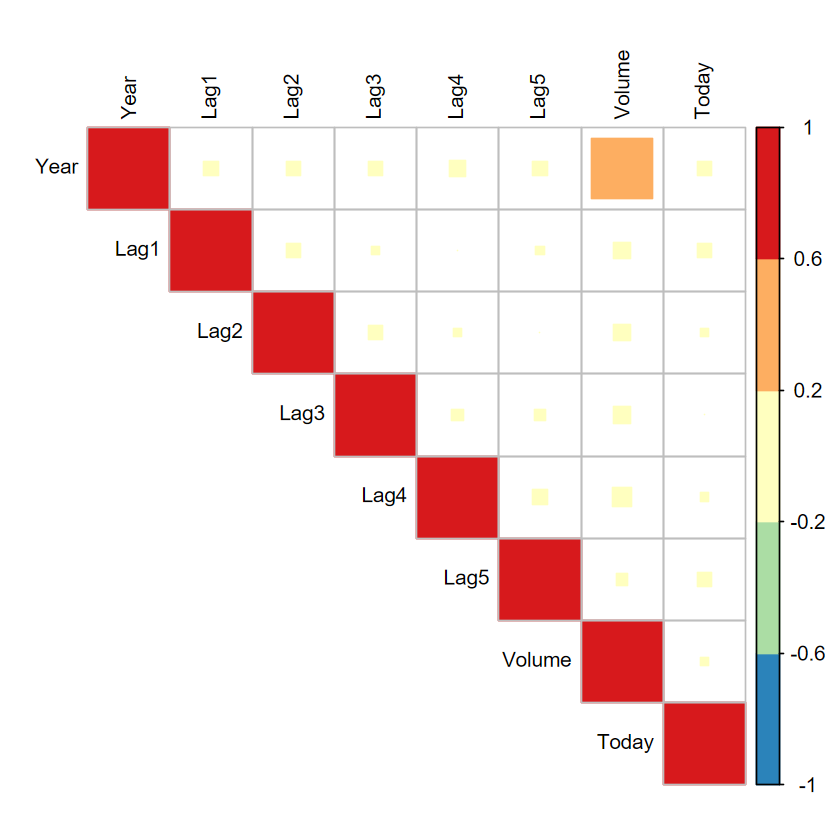

In [12]:
plot_cor(df = dat1[, -which(colnames(dat1) %in% c("Direction", "ID"))])